# Dollar Cost Average Investment Strategy vs Lump Sum Investment Strategy

Based on [Dollar Cost Average Investment Strategy vs Lump Sum Investment Strategy Using Python](https://www.youtube.com/watch?v=O5f7fa0np8Q) from [Computer Science](https://www.youtube.com/channel/UCbmb5IoBtHZTpYZCDBOC1CA)

**Disclaimer:** _Investing in the stock market involves risk and can lead to monetary loss. This material is purely for educational purposes and should not be taken as professional investment advice. Invest at your own discretion._

**Description:** Dollar Cost Average Investment vs Lump Sum strategies comparison

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
plt.style.use('fivethirtyeight')

## Read the data

In [3]:
asset = pd.read_csv('SP500.csv')

Show the data

In [4]:
asset

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-03-02,114.143598,114.250996,113.581850,113.879250,2574000,0.0,0
1,2012-03-05,113.614868,113.738779,112.995286,113.408340,2560000,0.0,0
2,2012-03-06,112.210520,112.260085,111.392667,111.657028,4195300,0.0,0
3,2012-03-07,111.979164,112.673093,111.855240,112.491348,2556000,0.0,0
4,2012-03-08,113.185280,113.837914,112.945714,113.598335,2587000,0.0,0
...,...,...,...,...,...,...,...,...
2511,2022-02-23,434.480011,435.149994,423.170013,423.480011,11345100,0.0,0
2512,2022-02-24,412.799988,430.609985,412.399994,430.140015,19259900,0.0,0
2513,2022-02-25,431.440002,439.769989,429.760010,439.609985,9651300,0.0,0
2514,2022-02-28,433.929993,440.119995,432.600006,438.720001,11167900,0.0,0


Set the date as the index

In [5]:
asset = asset.set_index(pd.DatetimeIndex(asset['Date'].values))

Show the data

In [6]:
asset

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
2012-03-02,2012-03-02,114.143598,114.250996,113.581850,113.879250,2574000,0.0,0
2012-03-05,2012-03-05,113.614868,113.738779,112.995286,113.408340,2560000,0.0,0
2012-03-06,2012-03-06,112.210520,112.260085,111.392667,111.657028,4195300,0.0,0
2012-03-07,2012-03-07,111.979164,112.673093,111.855240,112.491348,2556000,0.0,0
2012-03-08,2012-03-08,113.185280,113.837914,112.945714,113.598335,2587000,0.0,0
...,...,...,...,...,...,...,...,...
2022-02-23,2022-02-23,434.480011,435.149994,423.170013,423.480011,11345100,0.0,0
2022-02-24,2022-02-24,412.799988,430.609985,412.399994,430.140015,19259900,0.0,0
2022-02-25,2022-02-25,431.440002,439.769989,429.760010,439.609985,9651300,0.0,0
2022-02-28,2022-02-28,433.929993,440.119995,432.600006,438.720001,11167900,0.0,0


Visually show the the close historical data

Text(0, 0.5, 'Close Price (USD)')

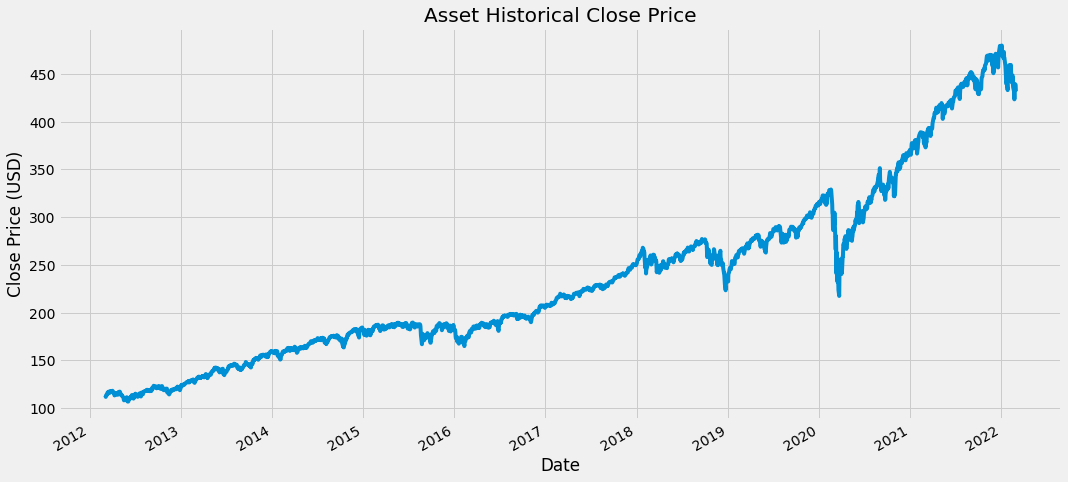

In [7]:
asset['Close'].plot(figsize=(16,8))
plt.title('Asset Historical Close Price')
plt.xlabel('Date')
plt.ylabel('Close Price (USD)')

## Calculate and show the lump sum investment strategy

Get the close pices from the data set

In [8]:
close_prices = asset['Close']

Choose the initial investment amount

In [9]:
initial_investment = 5000

Get the latest or last price value of the asset within this dataset

In [10]:
stock_latest_value = close_prices[-1]

Get the number of shares bought on each date with the hypothetical investment amount (aka lump sum)

In [11]:
num_shares_bought = initial_investment / close_prices

Calculate how much money would have according to the last price in this dataset for investing a lump sum on a given date in the past

In [12]:
lump_sum = stock_latest_value * num_shares_bought

Show the data

In [13]:
lump_sum

2012-03-02    18963.947122
2012-03-05    19042.691732
2012-03-06    19341.371537
2012-03-07    19197.921444
2012-03-08    19010.842563
                  ...     
2022-02-23     5099.650541
2022-02-24     5020.690923
2022-02-25     4912.536428
2022-02-28     4922.501963
2022-03-01     5000.000000
Name: Close, Length: 2516, dtype: float64

Compute and show the best and worst day for a lump sum investment

In [14]:
print('Lump sum investments:')
print(f'The best day to invest a ${initial_investment} lump sum\
 was on {lump_sum.idxmax().strftime("%b %d %Y")} and\
 would be worth ${round(lump_sum.max(), 2)}\
 on {lump_sum.last_valid_index().strftime("%b %d %Y")}')
print(f'The worst day to invest a ${initial_investment} lump sum\
 was on {lump_sum.idxmin().strftime("%b %d %Y")} and\
 would be worth ${round(lump_sum.min(), 2)}\
 on {lump_sum.last_valid_index().strftime("%b %d %Y")}')

Lump sum investments:
The best day to invest a $5000 lump sum was on Jun 04 2012 and would be worth $20236.76 on Mar 01 2022
The worst day to invest a $5000 lump sum was on Jan 03 2022 and would be worth $4500.67 on Mar 01 2022


Plot the lump sum data

Text(0, 0.5, 'Investment Value (USD)')

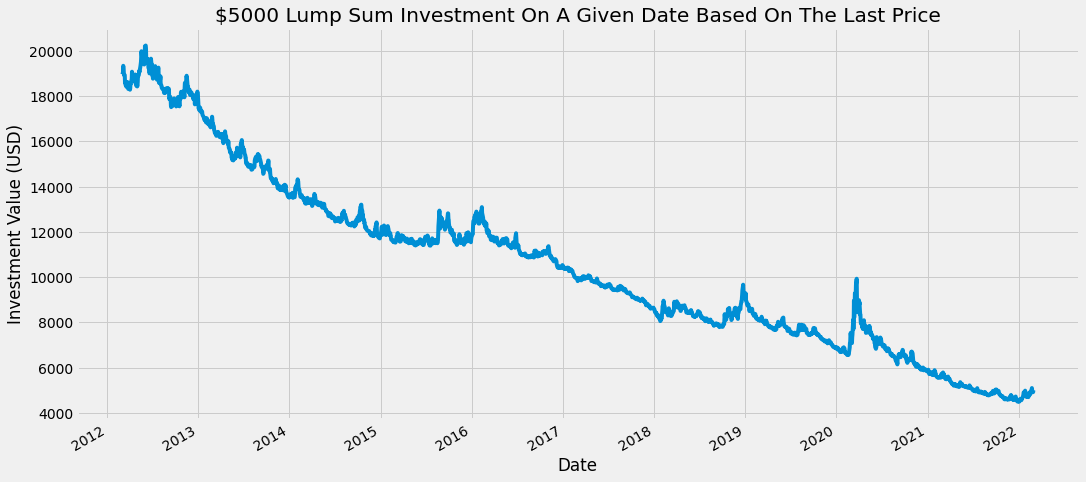

In [15]:
lump_sum.plot(figsize=(16,8))
plt.title(f'${initial_investment} Lump Sum Investment On A Given Date Based On The Last Price')
plt.xlabel('Date')
plt.ylabel('Investment Value (USD)')

## Create a function to calculate the Dollar Cost Averaging Strategy

In [16]:
def DCA(start_date, initial_investment):
    # Get the investment periods which will be 12
    investment_date_periods = 12
    
    # Calculate the portion or amount that we plan to invest for each investment date period
    investment_portion = initial_investment / investment_date_periods
    
    # Get the dates of the investment periods
    all_investment_dates = pd.date_range(start_date, periods=investment_date_periods, freq='30D')
    
    # Get the dates up to the last date in our date set
    investment_dates = all_investment_dates[all_investment_dates < asset.index[-1]]
    
    # Get the indices (and in turn the dates) within the data set that are the closest to the investment date
    closest_investment_dates = asset.index.searchsorted(investment_dates)
    
    # Get a list of stock prices at the closest investment date
    stock_prices = asset['Close'][closest_investment_dates]
    
    # Get the total number of shares that we invested in by summing all of the shares purchased in each of the investment dates
    total_shares_invested = sum(investment_portion / stock_prices)
    
    # Get the cash that was not invested from the initial investment amount
    uninvested_cash = investment_portion * sum(all_investment_dates >= asset.index[-1])
    
    # Calculate the total
    total = uninvested_cash + asset['Close'][-1] * total_shares_invested
    
    return total

Execute the DCA function

In [17]:
DCA_List = []
for date in asset.index:
    DCA_List.append(DCA(date, initial_investment))

Convert the list to a series

In [18]:
dca = pd.DataFrame()
dca['DCA'] = DCA_List

Set the date as the index

In [19]:
dca = dca.set_index(pd.DatetimeIndex(asset.index))

Convert the dataframe to a series

In [20]:
dca = dca.squeeze()

Show the data

In [21]:
dca

2012-03-02    18369.284218
2012-03-05    18464.161490
2012-03-06    18454.416855
2012-03-07    18424.484408
2012-03-08    18357.103518
                  ...     
2022-02-23     5008.304212
2022-02-24     5001.724244
2022-02-25     4992.711369
2022-02-28     4993.541830
2022-03-01     5000.000000
Name: DCA, Length: 2516, dtype: float64

Compute and show the best and worst day for a DCA investment

In [22]:
print('DCA investments:')
print(f'The best day to start DCAing a ${initial_investment} investment\
 was on {dca.idxmax().strftime("%b %d %Y")} and\
 would be worth ${round(dca.max(), 2)}\
 on {dca.last_valid_index().strftime("%b %d %Y")}')
print(f'The worst day to start DCAing a ${initial_investment} investment\
 was on {dca.idxmin().strftime("%b %d %Y")} and\
 would be worth ${round(dca.min(), 2)}\
 on {dca.last_valid_index().strftime("%b %d %Y")}')

DCA investments:
The best day to start DCAing a $5000 investment was on Mar 05 2012 and would be worth $18464.16 on Mar 01 2022
The worst day to start DCAing a $5000 investment was on Jul 07 2021 and would be worth $4848.57 on Mar 01 2022


Plot DCA

Text(0, 0.5, 'Investment Value (USD)')

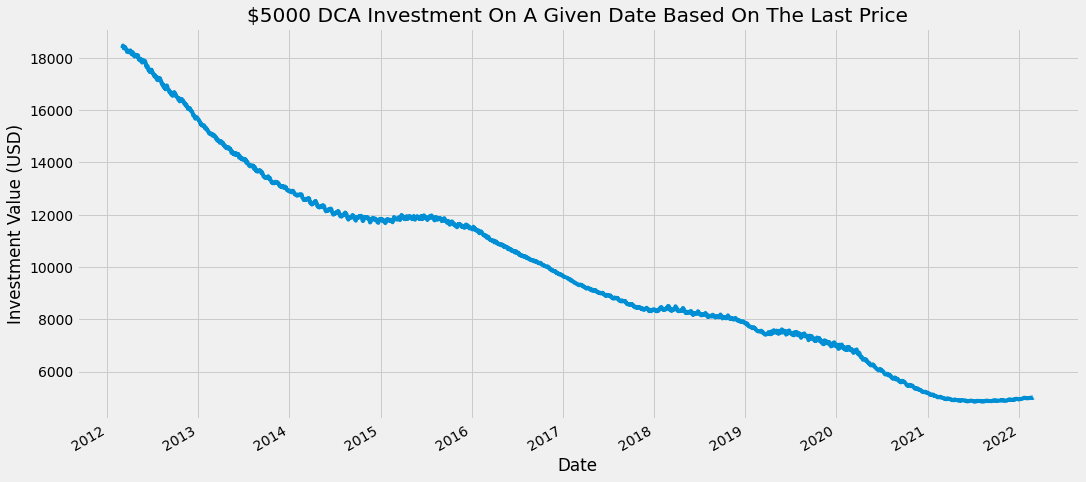

In [23]:
dca.plot(figsize=(16,8))
plt.title(f'${initial_investment} DCA Investment On A Given Date Based On The Last Price')
plt.xlabel('Date')
plt.ylabel('Investment Value (USD)')

Get the volatility

In [24]:
lump_sum_vol = lump_sum.pct_change().std()
dca_vol = dca.pct_change().std()
print(f"Lump sum volatility: {lump_sum_vol}")
print(f"DCA volatility: {dca_vol}")

Lump sum volatility: 0.01049969205861201
DCA volatility: 0.003171850434650312


Get the difference

In [25]:
difference = dca - lump_sum

Plot the difference

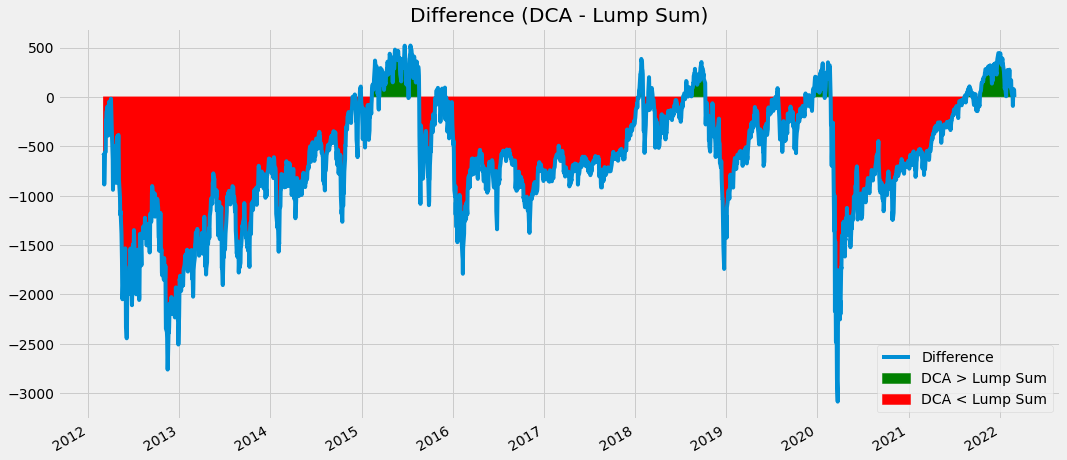

In [26]:
difference.plot(figsize=(16,8), label='Difference')
plt.fill_between(difference.index, y1=difference, y2=0, color='green', where=difference>0, label='DCA > Lump Sum')
plt.fill_between(difference.index, y1=difference, y2=0, color='red', where=difference<0, label='DCA < Lump Sum')
plt.title('Difference (DCA - Lump Sum)')
plt.legend()

Calculate the win percentages

In [27]:
lump_sum_win_percentage = round(sum(difference<0)/len(difference) * 100, 1)
dca_win_percentage = round(sum(difference>0)/len(difference) * 100, 1)

print(f'Lump Sum returned more than Dollar Cost Averaging : {lump_sum_win_percentage}% of the time')
print(f'Dollar Cost Averaging returned more than Lump Sum: {dca_win_percentage}% of the time')

Lump Sum returned more than Dollar Cost Averaging : 84.2% of the time
Dollar Cost Averaging returned more than Lump Sum: 15.8% of the time


**THIS IS NOT AN INVESTMENT ADVICE!**